In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


def display_contour(min_max_range, poly, model):
    x1 = np.linspace(min_max_range[0], min_max_range[1], 100)
    x2 = np.linspace(min_max_range[2], min_max_range[3], 100)
    X1, X2 = np.meshgrid(x1, x2)
    poly_X = poly.transform(np.c_[X1.ravel(), X2.ravel()])
    Z = model.predict(poly_X).reshape(X1.shape)
    plt.contour(X1, X2, Z, alpha=0.5, cmap='viridis')


def display_sample(X, y):
    for i, marker in enumerate(['x', 'o']):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=['red', 'blue'][i],
                    marker=marker, label=['negative', 'positive'][i])

    # 设置 x 轴 和 y 轴的范围
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

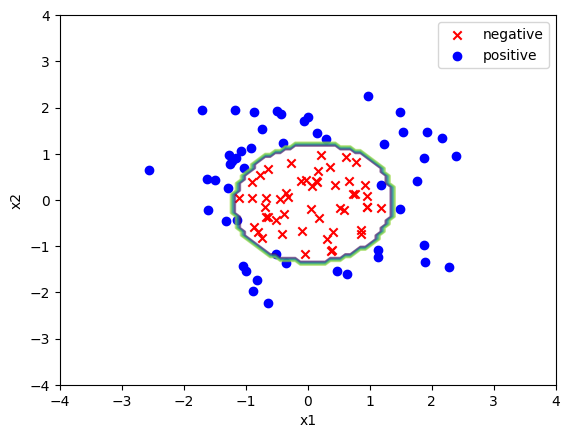

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import numpy as np

X1, y = make_gaussian_quantiles(
    n_samples=100, n_features=2, n_classes=2, random_state=0)

poly2 = PolynomialFeatures(degree=2)
poly_X1 = poly2.fit_transform(X1)

model = LogisticRegression(penalty='l2')
model.fit(poly_X1, y)  # 拟合样本数据

display_contour([-4, 4, -4, 4], poly2, model)
display_sample(X1, y)